<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Ask the Quantum 8-ball
Sometimes we let chance decide. Quantum uncertainty is the cornerstone design feature of Quantum computers. Once the program is executed on a Quantum computer, you will receive the most unbiased random answer, a *True* chance that classical computers incapable to provide. Think about a question that can be answered "yes or no" and run the code. Quantum 8-ball returns one of the 8 possible answers to your question. You might be already familiar with some parts of the code used in other Qiskit tutorials.

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
### Contributors
Oleksii Lialka, MBA

In [1]:
# begin with importing essential libraries for IBM Q
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit

To obtain $2^3 = 8$ outcomes with the equal likelyhood we need to generate 3 qubits and put them into superposition using The Hadamard gate $H$.

In [2]:
# set up Quantum Register and Classical Register for 3 qubits
q = QuantumRegister(3)
c = ClassicalRegister(3)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)

Visualize the circuit. Note: you need LaTeX to make visualizations. Details: https://www.latex-project.org/latex3/

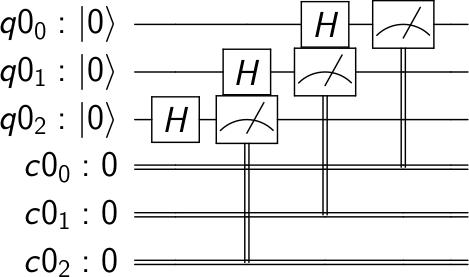

In [3]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qc)

Before we move on, let's assign predictions to interpret the outcomes. The particle can be observed in one of 8 states: [000, 001, 010, 011, 100, 101, 110, 111]. We link each state to the particular "answer".

In [4]:
def answer(result):
    for key in result.keys():
        state = key
    print('The Quantum 8-ball says:')
    if state == '000':
        print('It is certain.')
    elif state == '001':
        print('Without a doubt.')
    elif state == '010':
        print('Yes - definitely.')
    elif state == '011':
        print('Most likely.')
    elif state == '100':
        print("Don't count on it.")
    elif state == '101':
        print('My reply is no.')
    elif state == '110':
        print('Very doubtful.')
    else:
        print('Concentrate and ask again.')

## Simulation

First, we launch the program on a classical computer you are currently using (or cloud service), launch one particle, interpret and display the result.

In [6]:
from qiskit import execute
from qiskit import Aer
#from qiskit import get_backend
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=1)
result = job.result().get_counts(qc)
answer(result)

The Quantum 8-ball says:
Most likely.


Try to run the code multiple times to obtain different answer. The simulation is mimiking the behavior of quantum computer. States of the particle are generated using pseudo-random numbers, which give you the impression of being random, yet they are following certain prescribed rules and algorithms. Classical machines, unlike quantum computers, are inherently incapable of producing true random numbers.

## Running the program on real quantum computer

We are almost set to run the program on a real quantum computer.

In [7]:
# load IBM Q account
IBMQ.load_accounts()

In [8]:
# define the least busy device
from qiskit.backends.ibmq import least_busy
least_busy = least_busy(IBMQ.backends(simulator=False))
print("The least busy device:",least_busy.name())

The least busy device: ibmqx4


Once we successfully loaded IBM Q account and connected to the least busy quantum computer, it's time to run the program on real device.

In [9]:
job = execute(qc, backend=least_busy, shots=1)
result = job.result().get_counts(qc)
answer(result)

The Quantum 8-ball says:
It is certain.


Discover more Qiskit community tutorials: https://github.com/Qiskit/qiskit-tutorial